In [17]:
import pandas as pd
import matplotlib.pyplot as plt


path = 'data/ssp.csv'
df = pd.read_csv(path)
df.drop(columns=['Scenario'], inplace=True)
df.rename(columns={
    'Very likely range in °C\n(2081–2100)': '2081–2100 (low)',
    'Estimated warming\n(2081–2100)': '2081–2100 (estimated)',
    'Estimated warming\n(2041–2060)': '2041–2060 (estimated)',
    }, inplace=True)
df['2081–2100 (high)'] = df['2081–2100 (low)'].apply(lambda x: x.split('–')[1]).astype(float)
df['2081–2100 (low)'] = df['2081–2100 (low)'].apply(lambda x: x.split('–')[0]).astype(float)

df['2041–2060 (estimated)'] = df['2041–2060 (estimated)'].apply(lambda x: x.split()[0]).astype(float)
df['2081–2100 (estimated)'] = df['2081–2100 (estimated)'].apply(lambda x: x.split()[0]).astype(float)
df





,SSP,2041–2060 (estimated),2081–2100 (estimated),2081–2100 (low),2081–2100 (high)
0,SSP1-1.9,1.6,1.4,1.0,1.8
1,SSP1-2.6,1.7,1.8,1.3,2.4
2,SSP2-4.5,2.0,2.7,2.1,3.5
3,SSP3-7.0,2.1,3.6,2.8,4.6
4,SSP5-8.5,2.4,4.4,3.3,5.7


2050
2090
2090
2090


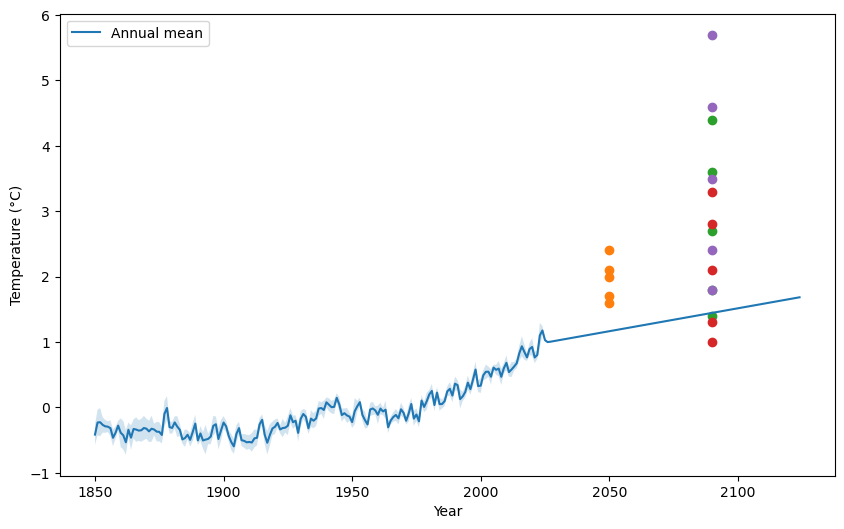

In [22]:
# stack df_T with forecast
df_T_forecast = pd.read_csv('data/T_forecast_auto_arima.csv', index_col=0)

df_T = pd.read_csv('data/processed_temperature_data.csv', index_col=0)

df_T = pd.concat([df_T, df_T_forecast])

# plot columns Annual, with error bars from Annual_uncertainty
plt.figure(figsize=(10, 6))
plt.plot(df_T.index, df_T['Annual'], label='Annual mean')
plt.fill_between(df_T.index, df_T['Annual'] - df_T['Annual_uncertainty'], df_T['Annual'] + df_T['Annual_uncertainty'], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
# plt.show()

for col in df.columns[1:]:
    year = col.split(' ')[0]
    year_low = year.split('–')[0]
    year_high = year.split('–')[1]
    year_low = int(year_low)
    year_high = int(year_high)
    year = int((year_low + year_high) / 2)
    print(year)

    plt.scatter([year]*5, df[col].values, label=col)






